In [ ]:
import zipfile
import os

#dearhivare
uploaded_file_path = "ML_dataset.zip"
extraction_dir = "ML_dataset"

with zipfile.ZipFile(uploaded_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

print(f"Files extracted to: {extraction_dir}")

Files extracted to: ML_dataset


IMPLEMENATRE 1 - simple neural network for binary classification

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


base_dir = "ML_dataset/ML_dataset"
directories = ['S', 'Z']
labels_map = {'S': 1, 'Z': 0}  #1 = epileptic 0 = healthy

X, y = [], [] #lists
max_length = 1500  #fixed length for all time series

for folder_name in directories:
    folder_path = os.path.join(base_dir, folder_name)   #to know in what subdirectory we are
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        print(file_path)
        data = np.loadtxt(file_path)  #time series represented by the files
        X.append(data) #data from each file goes into input
        y.append(labels_map[folder_name]) #adds labels

X = pad_sequences(X, maxlen=max_length, padding='post', truncating='post') #all timeseries become 1500 numbers long
y = np.array(y) #for ML np.array more efficient than lists

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

#simole feedforward nn
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),  #input layer
    tf.keras.layers.Dense(16, activation='relu'), #hidden layer (16 neurons)
    tf.keras.layers.Dense(1, activation='sigmoid') #output layer (1 neuron)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int) #converts probabilities given by sigmoid function into 0 and 1; false=0 (healthy) and true=1 (epileptic)
conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(6, 5))
print("Confusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy (0)', 'Epileptic (1)'],
            yticklabels=['Healthy (0)', 'Epileptic (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'ML_dataset/ML_dataset/S'

IMPLEMENTARE 2 - MLPclassifier for binary classification


Iteration 1/100
Iteration 2/100
Iteration 3/100
Iteration 4/100
Iteration 5/100
Iteration 6/100
Iteration 7/100
Iteration 8/100
Iteration 9/100
Iteration 10/100
Iteration 11/100
Iteration 12/100
Iteration 13/100
Iteration 14/100
Iteration 15/100
Iteration 16/100
Iteration 17/100
Iteration 18/100
Iteration 19/100
Iteration 20/100
Iteration 21/100
Iteration 22/100
Iteration 23/100
Iteration 24/100
Iteration 25/100
Iteration 26/100
Iteration 27/100
Iteration 28/100
Iteration 29/100
Iteration 30/100
Iteration 31/100
Iteration 32/100
Iteration 33/100
Iteration 34/100
Iteration 35/100
Iteration 36/100
Iteration 37/100
Iteration 38/100
Iteration 39/100
Iteration 40/100
Iteration 41/100
Iteration 42/100
Iteration 43/100
Iteration 44/100
Iteration 45/100
Iteration 46/100
Iteration 47/100
Iteration 48/100
Iteration 49/100
Iteration 50/100
Iteration 51/100
Iteration 52/100
Iteration 53/100
Iteration 54/100
Iteration 55/100
Iteration 56/100
Iteration 57/100
Iteration 58/100
Iteration 59/100
Iterat

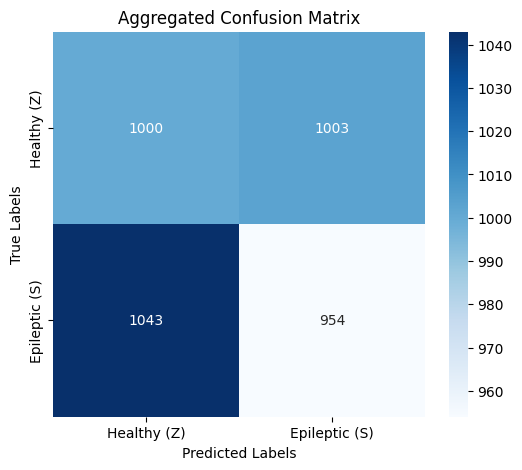

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

total_conf_matrix = np.zeros((2, 2))

base_dir = "ML_dataset/ML_dataset"
directories = ['S', 'Z']
labels_map = {'S': 1, 'Z': 0}  # 1 = epileptic, 0 = healthy

X, y = [], []

for folder_name in directories:
    folder_path = os.path.join(base_dir, folder_name)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        #print(f"Loading: {file_path}")
        data = np.loadtxt(file_path)
        X.append(data)  #
        y.append(labels_map[folder_name])

X = np.array(X)
y = np.array(y)
repeats = 100
accuracies = []

for i in range(repeats):
    print(f"Iteration {i+1}/{repeats}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    mlp = MLPClassifier(hidden_layer_sizes=(16, 8, 1), solver='adam', activation='tanh', max_iter=10000)
    mlp.fit(X_train_scaled, y_train)
    y_pred = mlp.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    total_conf_matrix += confusion_matrix(y_test, y_pred)

print("Accuracies across 100 iterations:", accuracies)
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print("Aggregated Confusion Matrix:\n", total_conf_matrix)

import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Healthy (Z)', 'Epileptic (S)']
plt.figure(figsize=(6, 5))
sns.heatmap(total_conf_matrix, annot=True, fmt=".0f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Aggregated Confusion Matrix")
plt.show()


kNN finetuned with PCA for epilepsy dataset

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Test Accuracy: 0.5750
Confusion Matrix:
 [[19  0]
 [17  4]]


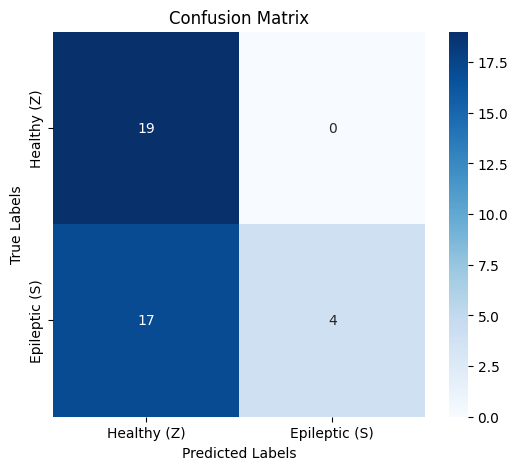

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = "ML_dataset/ML_dataset"
directories = ['S', 'Z']
labels_map = {'S': 1, 'Z': 0}  #1=epileptic, 0=healthy

X, y = [], []
for folder_name in directories:
    folder_path = os.path.join(base_dir, folder_name)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        data = np.loadtxt(file_path)
        X.append(data)
        y.append(labels_map[folder_name])

X = np.array(X)
y = np.array(y)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#kNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
labels = ['Healthy (Z)', 'Epileptic (S)']
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


Random Forest for epilepsy

Loading ML_dataset/ML_dataset/S/S041.txt
Loading ML_dataset/ML_dataset/S/S015.txt
Loading ML_dataset/ML_dataset/S/S100.txt
Loading ML_dataset/ML_dataset/S/S047.txt
Loading ML_dataset/ML_dataset/S/S026.txt
Loading ML_dataset/ML_dataset/S/S028.txt
Loading ML_dataset/ML_dataset/S/S089.txt
Loading ML_dataset/ML_dataset/S/S056.txt
Loading ML_dataset/ML_dataset/S/S093.txt
Loading ML_dataset/ML_dataset/S/S004.txt
Loading ML_dataset/ML_dataset/S/S040.txt
Loading ML_dataset/ML_dataset/S/S063.txt
Loading ML_dataset/ML_dataset/S/S095.txt
Loading ML_dataset/ML_dataset/S/S025.txt
Loading ML_dataset/ML_dataset/S/S078.txt
Loading ML_dataset/ML_dataset/S/S037.txt
Loading ML_dataset/ML_dataset/S/S006.txt
Loading ML_dataset/ML_dataset/S/S012.txt
Loading ML_dataset/ML_dataset/S/S011.txt
Loading ML_dataset/ML_dataset/S/S020.txt
Loading ML_dataset/ML_dataset/S/S064.txt
Loading ML_dataset/ML_dataset/S/S042.txt
Loading ML_dataset/ML_dataset/S/S079.txt
Loading ML_dataset/ML_dataset/S/S073.txt
Loading ML_datas

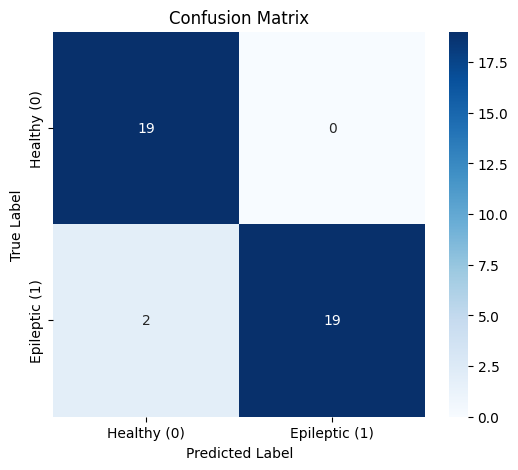

In [ ]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences

base_dir = "ML_dataset/ML_dataset"
directories = ['S', 'Z']
labels_map = {'S': 1, 'Z': 0}  #1=epileptic, 0=healthy
X, y = [], []
max_length = 1500

for folder_name in directories:
    folder_path = os.path.join(base_dir, folder_name)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        print(f"Loading {file_path}")
        data = np.loadtxt(file_path)
        X.append(data)
        y.append(labels_map[folder_name])

X = pad_sequences(X, maxlen=max_length, padding='post', truncating='post')
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

#random forrest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy (0)', 'Epileptic (1)'],
            yticklabels=['Healthy (0)', 'Epileptic (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Epilepsy ARIMA

In [ ]:
import os
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings("ignore")

base_dir    = "ML_dataset/ML_dataset"
directories = ['S', 'Z']
labels_map  = {'S': 1, 'Z': 0}  #1=epileptic, 0=healthy

X, y = [], []
for folder in directories:
    folder_path = os.path.join(base_dir, folder)
    for fname in os.listdir(folder_path):
        ts = np.loadtxt(os.path.join(folder_path, fname))
        X.append(ts)
        y.append(labels_map[folder])
X = np.array(X)
y = np.array(y)

#ARIMA feature extraction
arima_order = (2, 1, 2)
features = []

for ts in X:
    try:
        model = ARIMA(ts, order=arima_order)
        result = model.fit()
        ar = result.arparams if result.model_orders.get('ar', 0) > 0 else np.array([])
        ma = result.maparams if result.model_orders.get('ma', 0) > 0 else np.array([])
        ar = np.pad(ar, (0, arima_order[0] - len(ar)), "constant")
        ma = np.pad(ma, (0, arima_order[2] - len(ma)), "constant")
        features.append(np.hstack([result.aic, ar, ma]))
    except Exception:
        features.append(np.hstack([np.nan] + [0] * (arima_order[0] + arima_order[2])))

features = np.vstack(features)
print("Feature matrix shape:", features.shape)

#NaN values
mask = ~np.isnan(features).any(axis=1)
features = features[mask]
y = y[mask]

#adding logistic regression
X_tr, X_te, y_tr, y_te = train_test_split(
    features, y, test_size=0.2, random_state=60, stratify=y
)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_tr, y_tr)

y_pred = clf.predict(X_te)
acc    = accuracy_score(y_te, y_pred)
cm     = confusion_matrix(y_te, y_pred)

print(f"Test Accuracy: {acc:.4f}")
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy (0)', 'Epileptic (1)'],
            yticklabels=['Healthy (0)', 'Epileptic (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix — Simplified ARIMA + Logistic Regression")
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

Epilepsy GRU

Epoch 1/50
4/4 - 35s - 9s/step - accuracy: 0.5625 - loss: 0.7040 - val_accuracy: 0.7188 - val_loss: 0.5663
Epoch 2/50
4/4 - 39s - 10s/step - accuracy: 0.6719 - loss: 0.5856 - val_accuracy: 0.7812 - val_loss: 0.5026
Epoch 3/50
4/4 - 41s - 10s/step - accuracy: 0.6641 - loss: 0.5535 - val_accuracy: 0.7812 - val_loss: 0.4522
Epoch 4/50
4/4 - 25s - 6s/step - accuracy: 0.7891 - loss: 0.4975 - val_accuracy: 0.7500 - val_loss: 0.4082
Epoch 5/50
4/4 - 41s - 10s/step - accuracy: 0.7422 - loss: 0.4764 - val_accuracy: 0.8438 - val_loss: 0.3684
Epoch 6/50
4/4 - 45s - 11s/step - accuracy: 0.7812 - loss: 0.4392 - val_accuracy: 0.9062 - val_loss: 0.3356
Epoch 7/50
4/4 - 25s - 6s/step - accuracy: 0.8516 - loss: 0.3954 - val_accuracy: 0.9062 - val_loss: 0.3081
Epoch 8/50
4/4 - 41s - 10s/step - accuracy: 0.8672 - loss: 0.3770 - val_accuracy: 0.9062 - val_loss: 0.2800
Epoch 9/50
4/4 - 39s - 10s/step - accuracy: 0.9141 - loss: 0.3430 - val_accuracy: 0.9375 - val_loss: 0.2531
Epoch 10/50
4/4 - 42s - 11s/ste

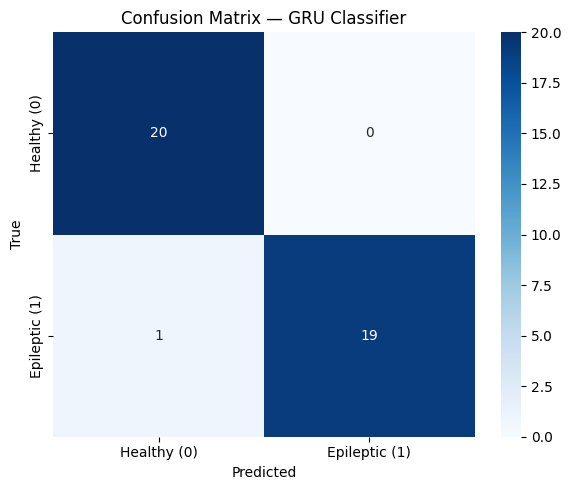

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

base_dir = "ML_dataset/ML_dataset"
folders = ['S', 'Z']
labels_map = {'S': 1, 'Z': 0}

X, y = [], []
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    for fname in os.listdir(folder_path):
        ts = np.loadtxt(os.path.join(folder_path, fname))
        X.append(ts)
        y.append(labels_map[folder])
X = np.array(X)[..., np.newaxis]
y = np.array(y)

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=60, stratify=y)

model = Sequential([
    GRU(64, return_sequences=True, input_shape=X_tr.shape[1:]),
    Dropout(0.3),
    GRU(32),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_tr, y_tr, validation_split=0.2, epochs=50, batch_size=32, callbacks=[es], verbose=2)

y_pred = (model.predict(X_te).ravel() > 0.5).astype(int)
acc = accuracy_score(y_te, y_pred)
cm = confusion_matrix(y_te, y_pred)

print(f"Test Accuracy: {acc:.4f}")
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy (0)', 'Epileptic (1)'],
            yticklabels=['Healthy (0)', 'Epileptic (1)'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix — GRU Classifier")
plt.tight_layout()
plt.show()


Epilepsy LSTM

Loaded 200 EEG series.
After padding: (200, 1500)
Input to LSTM: (200, 1500, 1)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_4 (Masking)             │ (None, 1500, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1500, 64)       │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1500, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
16/16 - 28s - 2s/step - accuracy: 0.7500 - loss: 0.5759 - val_accuracy: 0.9375 - val_loss: 0.4455
Epoch 2/30
16/16 - 23s - 1s/step - accuracy: 0.9297 - loss: 0.3422 - val_accuracy: 1.0000 - val_loss: 0.1990
Epoch 3/30
16/16 - 40s - 3s/step - accuracy: 0.9766 - loss: 0.1526 - val_accuracy: 1.0000 - val_loss: 0.1013
Epoch 4/30
16/16 - 39s - 2s/step - accuracy: 1.0000 - loss: 0.0578 - val_accuracy: 1.0000 - val_loss: 0.0339
Epoch 5/30
16/16 - 43s - 3s/step - accuracy: 0.9766 - loss: 0.1125 - val_accuracy: 0.9375 - val_loss: 0.1931
Epoch 6/30
16/16 - 42s - 3s/step - accuracy: 0.9609 - loss: 0.1692 - val_accuracy: 1.0000 - val_loss: 0.0410
Epoch 7/30
16/16 - 40s - 3s/step - accuracy: 0.9766 - loss: 0.0753 - val_accuracy: 1.0000 - val_loss: 0.0341
Epoch 8/30
16/16 - 40s - 2s/step - accuracy: 0.9844 - loss: 0.0583 - val_accuracy: 1.0000 - val_loss: 0.0383
Epoch 9/30
16/16 - 41s - 3s/step - accuracy: 1.0000 - loss: 0.0299 - val_accuracy: 1.0000 - val_loss: 0.0180
Epoch 10/30
16/16 -

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
Confusion Matrix:
 [[20  0]
 [ 0 20]]


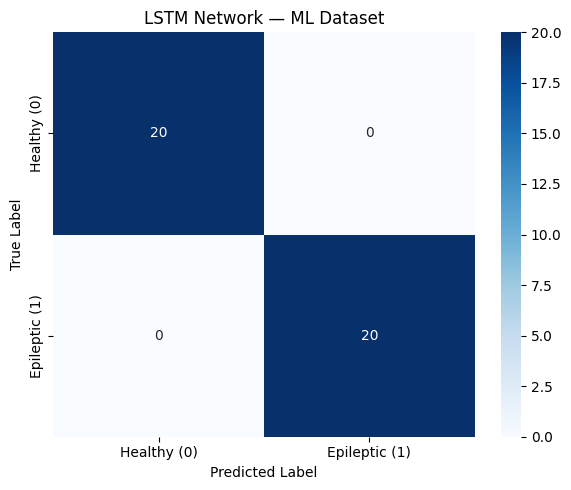

In [ ]:
import os
import warnings
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Masking, LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

base_dir    = "ML_dataset/ML_dataset"
dirs        = ['S', 'Z']
labels_map  = {'S': 1, 'Z': 0}
raw_X, y = [], []
for d in dirs:
    folder = os.path.join(base_dir, d)
    for fname in os.listdir(folder):
        path = os.path.join(folder, fname)
        ts = np.loadtxt(path)
        raw_X.append(ts)
        y.append(labels_map[d])

y = np.array(y)
print(f"Loaded {len(raw_X)} EEG series.")

max_len = 1500
X_pad = pad_sequences(
    raw_X,
    maxlen=max_len,
    padding='post',
    truncating='post',
    dtype='float32'
)
print("After padding:", X_pad.shape)

X = np.expand_dims(X_pad, axis=-1)
print("Input to LSTM:", X.shape)

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y,
    test_size=0.2,
    random_state=60,
    stratify=y
)

#LSTM
model = Sequential([
    Masking(mask_value=0.0, input_shape=(max_len, 1)),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()
history = model.fit(
    X_tr, y_tr,
    epochs=30,
    batch_size=8,
    validation_split=0.2,
    verbose=2
)
loss, acc = model.evaluate(X_te, y_te, verbose=0)
print(f"\nTest Accuracy: {acc:.4f}")

y_prob = model.predict(X_te)
y_pred = (y_prob > 0.5).astype(int).reshape(-1)
cm = confusion_matrix(y_te, y_pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy (0)', 'Epileptic (1)'],
            yticklabels=['Healthy (0)', 'Epileptic (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LSTM Network — ML Dataset")
plt.tight_layout()
plt.show()


MS dataset

In [ ]:
import zipfile
import os

#MS dataset
uploaded_file_path = "MS_dataset.zip"
extraction_dir = "MS_dataset"

with zipfile.ZipFile(uploaded_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

print(f"Files extracted to: {extraction_dir}")


Files extracted to: MS_dataset


MS neural network

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4211 - loss: 1.2433 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.5789 - loss: 10.2032 - val_accuracy: 1.0000 - val_loss: 0.0414
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.7368 - loss: 2.5292 - val_accuracy: 0.2000 - val_loss: 6.1473
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.8421 - loss: 0.3548 - val_accuracy: 0.2000 - val_loss: 12.7750
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.9474 - loss: 0.6349 - val_accuracy: 0.2000 - val_loss: 14.1640
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.9474 - loss: 0.1339 - val_accuracy: 0.2000 - val_loss: 13.3012
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.2000 - val_loss: 12.5029
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 1.0000 - loss: 8.4485e-04 - val_accuracy: 0.20

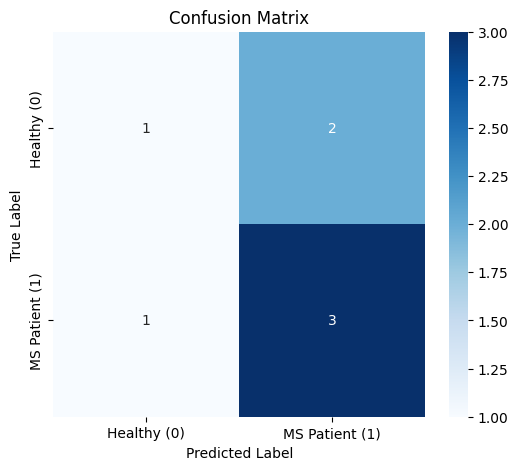

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

base_dir = "MS_dataset/text file/text file"
labels_map = {'healthy control': 0, 'multiple sclerosis': 1}  #0=healthy, 1=MS

X, y = [], []
max_length = 1500
for condition in labels_map.keys():
    condition_dir = os.path.join(base_dir, condition)
    if os.path.isdir(condition_dir):
        for file in os.listdir(condition_dir):
            if file.endswith(".txt"):
                file_path = os.path.join(condition_dir, file)
                if os.path.isfile(file_path):
                    try:
                        data = np.loadtxt(file_path)
                        X.append(data)
                        y.append(labels_map[condition])
                    except ValueError:
                        print(f"Warning: Could not load data from {file_path}")

if len(X) == 0:
    raise ValueError("No valid data files found in the dataset folder. Please check your files.")

X = np.array(X)
X = pad_sequences(X, maxlen=max_length, padding='post', truncating='post')
#2D array with shape (num_samples, max_length * num_features)
X = X.reshape((X.shape[0], X.shape[1] * X.shape[2]))
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

#simple feedforward neural network
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length * 257,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(6, 5))
print("Confusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy (0)', 'MS Patient (1)'],
            yticklabels=['Healthy (0)', 'MS Patient (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


MLPClassifier

Iteration 1/100
Iteration 2/100
Iteration 3/100
Iteration 4/100
Iteration 5/100
Iteration 6/100
Iteration 7/100
Iteration 8/100
Iteration 9/100
Iteration 10/100
Iteration 11/100
Iteration 12/100
Iteration 13/100
Iteration 14/100
Iteration 15/100
Iteration 16/100
Iteration 17/100
Iteration 18/100
Iteration 19/100
Iteration 20/100
Iteration 21/100
Iteration 22/100
Iteration 23/100
Iteration 24/100
Iteration 25/100
Iteration 26/100
Iteration 27/100
Iteration 28/100
Iteration 29/100
Iteration 30/100
Iteration 31/100
Iteration 32/100
Iteration 33/100
Iteration 34/100
Iteration 35/100
Iteration 36/100
Iteration 37/100
Iteration 38/100
Iteration 39/100
Iteration 40/100
Iteration 41/100
Iteration 42/100
Iteration 43/100
Iteration 44/100
Iteration 45/100
Iteration 46/100
Iteration 47/100
Iteration 48/100
Iteration 49/100
Iteration 50/100
Iteration 51/100
Iteration 52/100
Iteration 53/100
Iteration 54/100
Iteration 55/100
Iteration 56/100
Iteration 57/100
Iteration 58/100
Iteration 59/100
Iterat

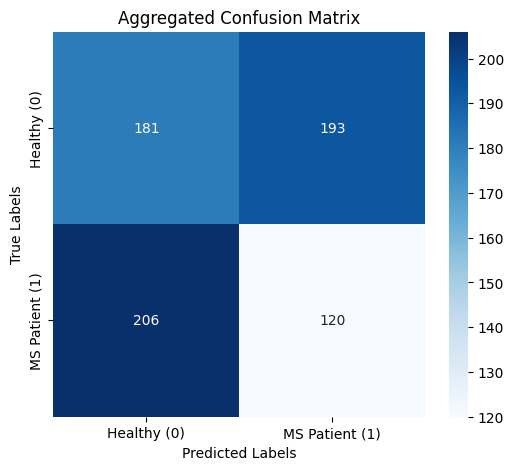

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns

total_conf_matrix = np.zeros((2, 2))
base_dir = "MS_dataset/text file/text file"
labels_map = {'healthy control': 0, 'multiple sclerosis': 1}

X, y = [], []
max_length = 1500
for condition in labels_map.keys():
    condition_dir = os.path.join(base_dir, condition)
    if os.path.isdir(condition_dir):
        for file in os.listdir(condition_dir):
            file_path = os.path.join(condition_dir, file)
            data = np.loadtxt(file_path)
            X.append(data)
            y.append(labels_map[condition])

X = np.array(X)
y = np.array(y)
X = pad_sequences(X, maxlen=max_length, padding='post', truncating='post')
X = X.reshape((X.shape[0], X.shape[1] * X.shape[2]))

repeats = 100
accuracies = []

for i in range(repeats):
    print(f"Iteration {i+1}/{repeats}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    mlp = MLPClassifier(hidden_layer_sizes=(16, 8, 1), solver='adam', activation='tanh', max_iter=10000)
    mlp.fit(X_train_scaled, y_train)
    y_pred = mlp.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    total_conf_matrix += confusion_matrix(y_test, y_pred)

print("Accuracies across 100 iterations:", accuracies)
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print("Aggregated Confusion Matrix:\n", total_conf_matrix)
labels = ['Healthy (0)', 'MS Patient (1)']
plt.figure(figsize=(6, 5))
sns.heatmap(total_conf_matrix, annot=True, fmt=".0f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Aggregated Confusion Matrix")
plt.show()


MS kNN

Iteration 1/100
Iteration 2/100
Iteration 3/100
Iteration 4/100
Iteration 5/100
Iteration 6/100
Iteration 7/100
Iteration 8/100
Iteration 9/100
Iteration 10/100
Iteration 11/100
Iteration 12/100
Iteration 13/100
Iteration 14/100
Iteration 15/100
Iteration 16/100
Iteration 17/100
Iteration 18/100
Iteration 19/100
Iteration 20/100
Iteration 21/100
Iteration 22/100
Iteration 23/100
Iteration 24/100
Iteration 25/100
Iteration 26/100
Iteration 27/100
Iteration 28/100
Iteration 29/100
Iteration 30/100
Iteration 31/100
Iteration 32/100
Iteration 33/100
Iteration 34/100
Iteration 35/100
Iteration 36/100
Iteration 37/100
Iteration 38/100
Iteration 39/100
Iteration 40/100
Iteration 41/100
Iteration 42/100
Iteration 43/100
Iteration 44/100
Iteration 45/100
Iteration 46/100
Iteration 47/100
Iteration 48/100
Iteration 49/100
Iteration 50/100
Iteration 51/100
Iteration 52/100
Iteration 53/100
Iteration 54/100
Iteration 55/100
Iteration 56/100
Iteration 57/100
Iteration 58/100
Iteration 59/100
Iterat

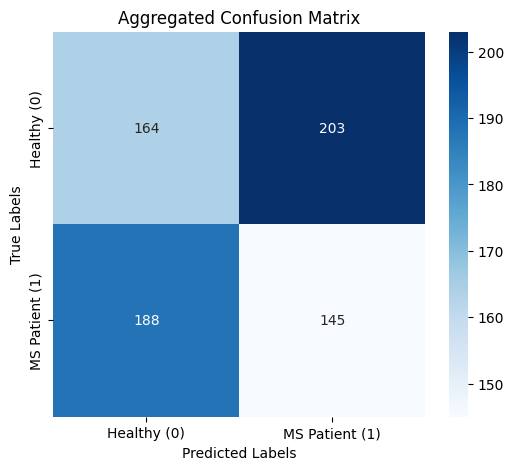

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = "MS_dataset/text file/text file"
labels_map = {'healthy control': 0, 'multiple sclerosis': 1}

X, y = [], []
max_length = 1500
for condition in labels_map.keys():
    condition_dir = os.path.join(base_dir, condition)
    if os.path.isdir(condition_dir):
        for file in os.listdir(condition_dir):
            file_path = os.path.join(condition_dir, file)
            try:
                data = np.loadtxt(file_path)
                X.append(data)
                y.append(labels_map[condition])
            except ValueError:
                print(f"Warning: Could not load data from {file_path}")

X = np.array(X)
y = np.array(y)
X = pad_sequences(X, maxlen=max_length, padding='post', truncating='post')
X = X.reshape((X.shape[0], -1))
repeats = 100
accuracies = []
total_conf_matrix = np.zeros((2, 2))

#kNN k = 5
knn = KNeighborsClassifier(n_neighbors=5)
for i in range(repeats):
    print(f"Iteration {i+1}/{repeats}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    total_conf_matrix += confusion_matrix(y_test, y_pred)

print("Accuracies across 100 iterations:", accuracies)
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print("Aggregated Confusion Matrix:\n", total_conf_matrix)
labels = ['Healthy (0)', 'MS Patient (1)']
plt.figure(figsize=(6, 5))
sns.heatmap(total_conf_matrix, annot=True, fmt=".0f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Aggregated Confusion Matrix")
plt.show()


PCA MS

Test Accuracy: 0.5714
Confusion Matrix:
 [[1 2]
 [1 3]]


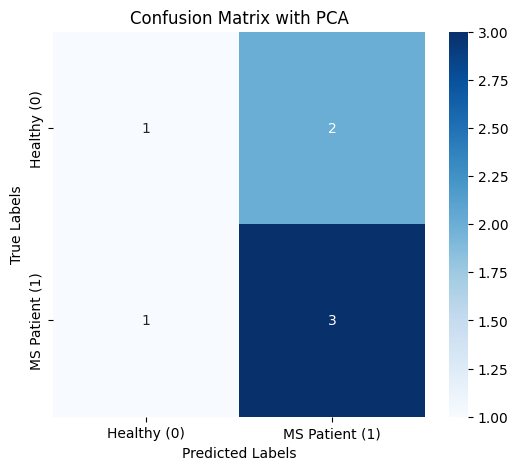

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = "MS_dataset/text file/text file"
labels_map = {'healthy control': 0, 'multiple sclerosis': 1}

X, y = [], []

for condition in labels_map.keys():
    condition_dir = os.path.join(base_dir, condition)
    if os.path.isdir(condition_dir):
        for file in os.listdir(condition_dir):
            if file.endswith(".txt"):
                file_path = os.path.join(condition_dir, file)
                try:
                    data = np.loadtxt(file_path)
                    X.append(data)
                    y.append(labels_map[condition])
                except ValueError:
                    print(f"Warning: Could not load data from {file_path}")

X = np.array(X).reshape(len(X), -1)  #2D flattening
y = np.array(y)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
#PCA 20 dimensions from 31
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#kNN
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
labels = ['Healthy (0)', 'MS Patient (1)']
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix with PCA")
plt.show()


Finetuning kNN with PCA MS

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Test Accuracy: 0.7143
Confusion Matrix:
 [[2 1]
 [1 3]]


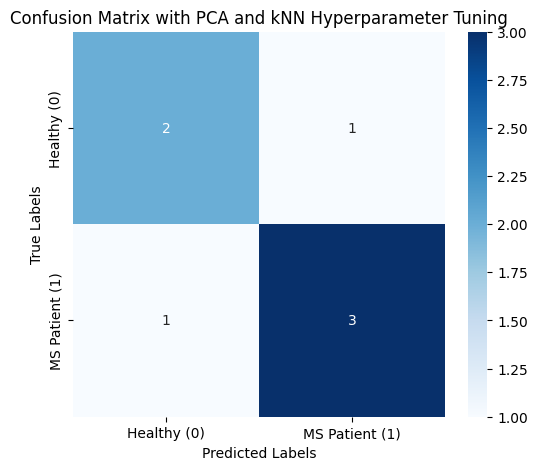

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


base_dir = "MS_dataset/text file/text file"
labels_map = {'healthy control': 0, 'multiple sclerosis': 1}
X, y = [], []

for condition in labels_map.keys():
    condition_dir = os.path.join(base_dir, condition)
    if os.path.isdir(condition_dir):
        for file in os.listdir(condition_dir):
            if file.endswith(".txt"):
                file_path = os.path.join(condition_dir, file)
                try:
                    data = np.loadtxt(file_path)
                    X.append(data)
                    y.append(labels_map[condition])
                except ValueError:
                    print(f"Warning: Could not load data from {file_path}")

X = np.array(X).reshape(len(X), -1)  #2D flattening
y = np.array(y)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# PCA
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#kNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
labels = ['Healthy (0)', 'MS Patient (1)']
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix with PCA and kNN Hyperparameter Tuning")
plt.show()


Random Forest MS

Test Accuracy: 0.8571
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.75      0.86         4

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7

Confusion Matrix:
[[3 0]
 [1 3]]


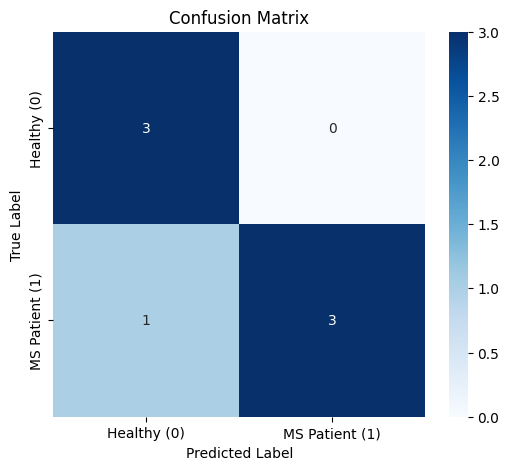

In [ ]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


base_dir = "MS_dataset/text file/text file"
labels_map = {'healthy control': 0, 'multiple sclerosis': 1}  #0=healthy, 1=MS

X, y = [], []
max_length = 1500  #

for condition in labels_map.keys():
    condition_dir = os.path.join(base_dir, condition)
    if os.path.isdir(condition_dir):
        for file in os.listdir(condition_dir):
            if file.endswith(".txt"):
                file_path = os.path.join(condition_dir, file)
                if os.path.isfile(file_path):
                    try:
                        data = np.loadtxt(file_path)
                        X.append(data)
                        y.append(labels_map[condition])
                    except ValueError:
                        print(f"Warning: Could not load data from {file_path}")

if len(X) == 0:
    raise ValueError("No valid data files found in the dataset folder. Please check your files.")
X = np.array(X)
X = pad_sequences(X, maxlen=max_length, padding='post', truncating='post')


X = X.reshape((X.shape[0], X.shape[1] * X.shape[2]))
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy (0)', 'MS Patient (1)'],
            yticklabels=['Healthy (0)', 'MS Patient (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


MS ARIMA

Loaded 31 series.
After padding, X_padded.shape = (31, 1500, 257)
Univariate series shape: (31, 1500)
ARIMA succeeded on 31 / 31 series.

Test Accuracy: 0.5714
Confusion Matrix:
 [[3 1]
 [2 1]]


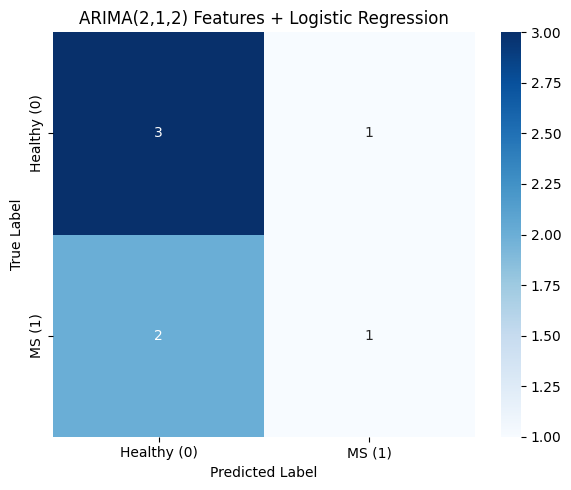

In [ ]:
import os
import warnings
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

base_dir   = "MS_dataset/text file/text file"
labels_map = {'healthy control': 0, 'multiple sclerosis': 1}

raw_X, y = [], []
for condition, lbl in labels_map.items():
    folder = os.path.join(base_dir, condition)
    if not os.path.isdir(folder):
        continue
    for fname in os.listdir(folder):
        path = os.path.join(folder, fname)
        try:
            ts = np.loadtxt(path)
            raw_X.append(ts)
            y.append(lbl)
        except ValueError:
            print(f"Warning: could not load {path}")

y = np.array(y)
print(f"Loaded {len(raw_X)} series.")

max_length = 1500
X_padded = pad_sequences(
    raw_X,
    maxlen=max_length,
    padding='post',
    truncating='post',
    dtype='float32'
)
print("After padding, X_padded.shape =", X_padded.shape)
X_uni = X_padded.mean(axis=2)
print("Univariate series shape:", X_uni.shape)

#ARIMA(2,1,2)
arima_order = (2, 1, 2)
n_ar, n_ma  = arima_order[0], arima_order[2]

N = X_uni.shape[0]
features = np.zeros((N, 1 + n_ar + n_ma), dtype='float32')
success  = np.zeros(N, dtype=bool)
aic_list = []

for i, ts in enumerate(X_uni):
    try:
        res = ARIMA(ts, order=arima_order).fit()
        aic = res.aic
        ar = res.arparams if res.model_orders.get('ar', 0) > 0 else np.zeros(0)
        ma = res.maparams if res.model_orders.get('ma', 0) > 0 else np.zeros(0)
        ar = np.pad(ar, (0, n_ar - len(ar)), 'constant')
        ma = np.pad(ma, (0, n_ma - len(ma)), 'constant')
        features[i] = np.hstack([aic, ar, ma])
        aic_list.append(aic)
        success[i] = True

    except Exception:
        pass
if not success.all():
    median_aic = np.median(aic_list)
    features[~success, 0] = median_aic

print(f"ARIMA succeeded on {success.sum()} / {N} series.")
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(features)

X_tr, X_te, y_tr, y_te = train_test_split(
    X_scaled, y,
    test_size=0.20,
    random_state=60,
    stratify=y
)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_tr, y_tr)
y_pred = clf.predict(X_te)
acc    = accuracy_score(y_te, y_pred)
cm     = confusion_matrix(y_te, y_pred)

print(f"\nTest Accuracy: {acc:.4f}")
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy (0)', 'MS (1)'],
            yticklabels=['Healthy (0)', 'MS (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("ARIMA(2,1,2) Features + Logistic Regression")
plt.tight_layout()
plt.show()


MS GRU

Epoch 1/30
3/3 - 14s - 5s/step - accuracy: 0.4211 - loss: 0.8081 - val_accuracy: 0.4000 - val_loss: 0.8729
Epoch 2/30
3/3 - 6s - 2s/step - accuracy: 0.9474 - loss: 0.3623 - val_accuracy: 0.2000 - val_loss: 0.7723
Epoch 3/30
3/3 - 10s - 3s/step - accuracy: 0.8947 - loss: 0.3018 - val_accuracy: 0.6000 - val_loss: 0.6947
Epoch 4/30
3/3 - 11s - 4s/step - accuracy: 1.0000 - loss: 0.2398 - val_accuracy: 0.6000 - val_loss: 0.6851
Epoch 5/30
3/3 - 10s - 3s/step - accuracy: 0.8947 - loss: 0.2061 - val_accuracy: 0.6000 - val_loss: 0.7501
Epoch 6/30
3/3 - 10s - 3s/step - accuracy: 1.0000 - loss: 0.1210 - val_accuracy: 0.6000 - val_loss: 0.8639
Epoch 7/30
3/3 - 6s - 2s/step - accuracy: 1.0000 - loss: 0.1175 - val_accuracy: 0.4000 - val_loss: 0.9469
Epoch 8/30
3/3 - 7s - 2s/step - accuracy: 1.0000 - loss: 0.0797 - val_accuracy: 0.4000 - val_loss: 0.9563
Epoch 9/30
3/3 - 9s - 3s/step - accuracy: 1.0000 - loss: 0.0738 - val_accuracy: 0.4000 - val_loss: 0.9377
Epoch 10/30
3/3 - 7s - 2s/step - accuracy

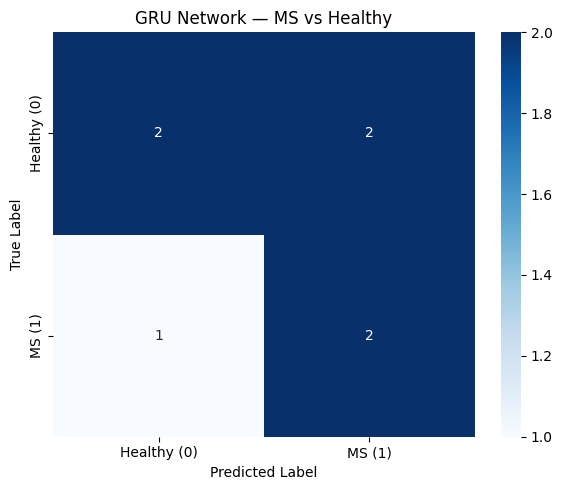

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Masking, GRU, Dropout, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings

warnings.filterwarnings("ignore")

base_dir = "MS_dataset/text file/text file"
labels_map = {'healthy control': 0, 'multiple sclerosis': 1}

raw_X, y = [], []
for cond, lbl in labels_map.items():
    folder = os.path.join(base_dir, cond)
    if not os.path.isdir(folder):
        continue
    for fname in os.listdir(folder):
        try:
            arr = np.loadtxt(os.path.join(folder, fname))
            raw_X.append(arr.astype("float32"))
            y.append(lbl)
        except ValueError:
            pass

y = np.array(y)
max_len = 1500
X_pad = pad_sequences(raw_X, maxlen=max_len, padding='post', truncating='post', dtype='float32')

X_tr, X_te, y_tr, y_te = train_test_split(X_pad, y, test_size=0.2, random_state=60, stratify=y)
timesteps, n_feats = X_pad.shape[1], X_pad.shape[2]

model = Sequential([
    Masking(0., input_shape=(timesteps, n_feats)),
    GRU(64, return_sequences=True),
    Dropout(0.2),
    GRU(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_tr, y_tr, epochs=30, batch_size=8, validation_split=0.2, verbose=2)

loss, acc = model.evaluate(X_te, y_te, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

y_pred = (model.predict(X_te).ravel() > 0.5).astype(int)
cm = confusion_matrix(y_te, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy (0)','MS (1)'],
            yticklabels=['Healthy (0)','MS (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("GRU Network — MS vs Healthy")
plt.tight_layout()
plt.show()


Loaded 31 samples.
After padding: (31, 1500, 257)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_3 (Masking)             │ (None, 1500, 257)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 1500, 64)       │        82,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1500, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,881 (370.63 KB)

 Trainable params: 94,881 (370.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
3/3 - 13s - 4s/step - accuracy: 0.4211 - loss: 0.7317 - val_accuracy: 0.6000 - val_loss: 0.6647
Epoch 2/30
3/3 - 6s - 2s/step - accuracy: 0.9474 - loss: 0.4997 - val_accuracy: 0.8000 - val_loss: 0.6961
Epoch 3/30
3/3 - 7s - 2s/step - accuracy: 1.0000 - loss: 0.4240 - val_accuracy: 0.4000 - val_loss: 0.8146
Epoch 4/30
3/3 - 6s - 2s/step - accuracy: 1.0000 - loss: 0.3419 - val_accuracy: 0.2000 - val_loss: 0.9378
Epoch 5/30
3/3 - 10s - 3s/step - accuracy: 1.0000 - loss: 0.2823 - val_accuracy: 0.2000 - val_loss: 1.0106
Epoch 6/30
3/3 - 10s - 3s/step - accuracy: 1.0000 - loss: 0.2361 - val_accuracy: 0.2000 - val_loss: 1.0751
Epoch 7/30
3/3 - 6s - 2s/step - accuracy: 1.0000 - loss: 0.1816 - val_accuracy: 0.2000 - val_loss: 1.1507
Epoch 8/30
3/3 - 10s - 3s/step - accuracy: 1.0000 - loss: 0.1360 - val_accuracy: 0.2000 - val_loss: 1.1891
Epoch 9/30
3/3 - 10s - 3s/step - accuracy: 1.0000 - loss: 0.1125 - val_accuracy: 0.2000 - val_loss: 1.1999
Epoch 10/30
3/3 - 10s - 3s/step - accurac

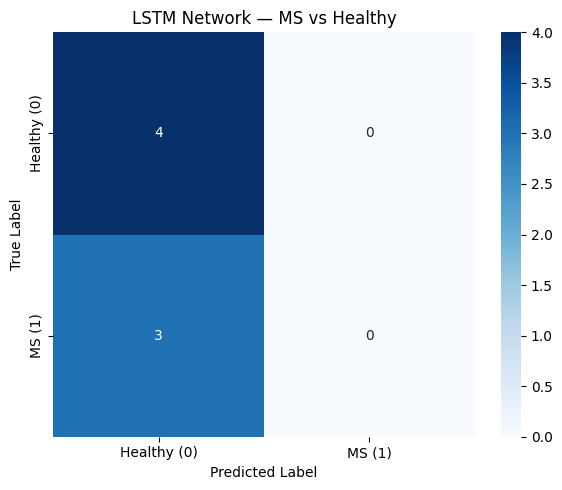

In [ ]:
import os
import warnings
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Masking, LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

base_dir   = "MS_dataset/text file/text file"
labels_map = {'healthy control': 0, 'multiple sclerosis': 1}
raw_X, y = [], []
for cond, lbl in labels_map.items():
    folder = os.path.join(base_dir, cond)
    if not os.path.isdir(folder):
        continue
    for fname in os.listdir(folder):
        path = os.path.join(folder, fname)
        try:
            arr = np.loadtxt(path)
            raw_X.append(arr)
            y.append(lbl)
        except ValueError:
            print(f"Warning: couldn't load {path}")

y = np.array(y)
print(f"Loaded {len(raw_X)} samples.")
max_len = 1500
X_pad = pad_sequences(
    raw_X,
    maxlen=max_len,
    padding='post',
    truncating='post',
    dtype='float32'
)
print("After padding:", X_pad.shape)

X_tr, X_te, y_tr, y_te = train_test_split(
    X_pad, y,
    test_size=0.2,
    random_state=60,
    stratify=y
)

timesteps, n_feats = max_len, X_pad.shape[2]
model = Sequential([
    Masking(mask_value=0., input_shape=(timesteps, n_feats)),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()
history = model.fit(
    X_tr, y_tr,
    epochs=30,
    batch_size=8,
    validation_split=0.2,
    verbose=2
)

loss, acc = model.evaluate(X_te, y_te, verbose=0)
print(f"\nTest Accuracy: {acc:.4f}")
y_prob = model.predict(X_te)
y_pred = (y_prob > 0.5).astype(int).reshape(-1)
cm = confusion_matrix(y_te, y_pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy (0)','MS (1)'],
            yticklabels=['Healthy (0)','MS (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LSTM Network — MS vs Healthy")
plt.tight_layout()
plt.show()
